# INTRODUCCIÓN

Junto con el departamento de marketing se ha recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. Para esto es necesario priorizar las hipótesis, lanzar un test A/B y finalmente analizar los resultados.

Primero se observarán las hipótesis para priorizar las mejores, con el método ICE y RICE.
Luego se hará un análisis de test A/B para concluir si la prueba es un éxito o no. 

# TABLA DE CONTENIDO

# 1. Priorizar hipótesis
# 2. Análisis de test A/B
# 3. Conclusiones

In [21]:
#importando los paquetes
import pandas as pd
import seaborn as sns
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# PRIORIZAR HIPÓTESIS

In [22]:
#guardando y mostrando el dataset
pd.set_option('max_colwidth', 450)

try:
    hypotheses = pd.read_csv("/datasets/hypotheses_us.csv", sep=";")
except:
    hypotheses = pd.read_csv("hypotheses_us.csv", sep=";")

    hypotheses

In [23]:
#aplicando el framework ICE para priorizar hipótesis
hypotheses["ICE"] = (hypotheses["Impact"] * hypotheses["Confidence"]) / hypotheses["Effort"]
hypotheses[["Hypothesis", "ICE"]].sort_values(by="ICE", ascending = False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


In [24]:
#aplicando el framework RICE para priorizar hipótesis
hypotheses["RICE"] = (hypotheses["Reach"] * hypotheses["Impact"] * hypotheses["Confidence"]) / hypotheses["Effort"]
hypotheses[["Hypothesis", "RICE"]].sort_values(by="RICE", ascending = False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


<AxesSubplot:>

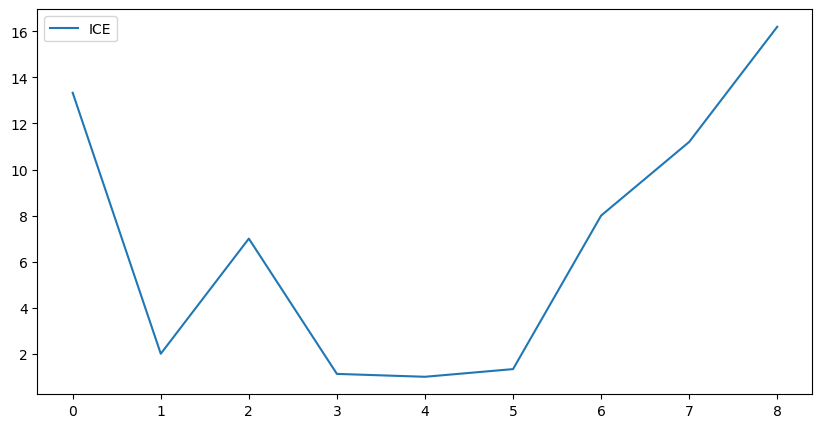

In [25]:
#graficando el ICE
hypotheses[["ICE"]].plot(figsize=(10,5))

<AxesSubplot:>

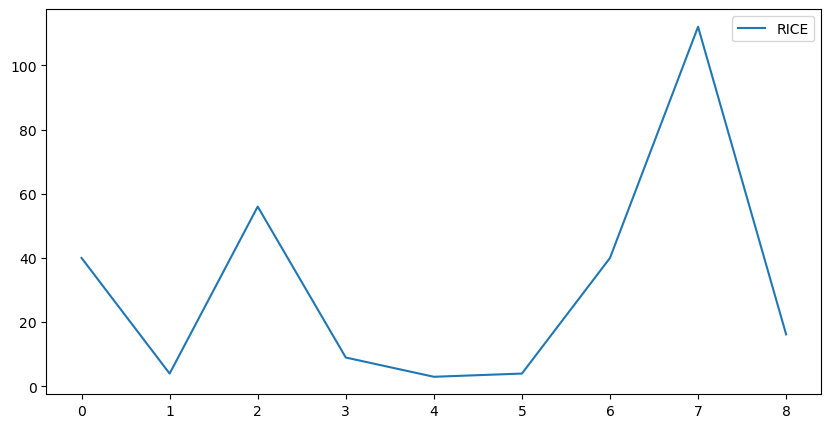

In [26]:
#graficando el RICE
hypotheses[["RICE"]].plot(figsize=(10,5))

Cuando se utiliza RICE se incluye el factor "Alcance" o "Reach", este indica cuantos usuarios alcanza o, en otrass palabras, se verá afectado, por la actualización o el cambio que se realizará según la hipótesis.

Para las hipótesis anteriores, cuando se aplica RICE si hay una diferencia, ya que como se menciona anteriormente, esta forma toma en cuenta el alcance. Por ejemplo, se puede observar que en ICE las hipótesis priorizadas (las 5 mejores) son las 8, 0, 7, 6 y 2. Por otro lado, con RICE las hipótesis priorizadas son las mismas pero en distinto orden... 7, 2, 0, 6 y 8.

Hipótesis con mayor ICE:
8. Descuento a usuarios en sus cumpleaños
0. Agregar dos canales más para atraer tráfico, incrementando los usuarios en 30%
7. Añadir formulario de suscripción a las páginas principales para compilar lista de correos
6. Mostrar banners con ofertas y rebajas actuales en la página principal para impulsar la conversión.
2. Agregar bloques de recomendación de productos al sitio de la tienda. Esto aumentará la conversión y el tamaño promedio de compra.

Hipótesis con mayor RICE: Son las mismas pero en el orden 7, 2, 0, 6 y 8.

# ANÁLISIS DE TEST A/B

## Preprocesamiento de los datos

In [27]:
#guardando y mostrando el dataset orders

try:
    orders = pd.read_csv("/datasets/orders_us.csv")
except:
    orders = pd.read_csv("orders_us.csv")
    
orders["date"] = pd.to_datetime(orders["date"], format= "%Y-%m-%d")
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [28]:
#calculando el número de órdenes por grupo
groups = orders.groupby("group").agg({"visitorId":"count"})
groups

,visitorId
group,
A,557
B,640


In [29]:
#calculando usuarios que se encuentran en ambos grupos
duplicate_visitor = orders.groupby("visitorId").agg({"group" : "nunique"}).reset_index()
duplicate_visitor = duplicate_visitor.query('group == 2')
print("Existen", duplicate_visitor["group"].count(), "usuarios que están en el grupo A y B")

Existen 58 usuarios que están en el grupo A y B


In [30]:
#obteniendo la lista de duplicados
list_duplicate_visitor = duplicate_visitor["visitorId"].unique()
list_duplicate_visitor

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830], dtype=int64)

In [31]:
#eliminando la información de los usuarios que se encuentran en ambos grupos
orders = orders.query('visitorId not in @list_duplicate_visitor')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [32]:
#calculando el número de órdenes por grupo
groups = orders.groupby("group").agg({"visitorId":"count"})
groups

,visitorId
group,
A,468
B,548


Se realizó con éxito el preprocesamiento de los datos eliminando la información de los usuarios que realizaron compras y que se encontraban en ambos grupos (58 usuarios).

In [33]:
#guardando y mostrando el dataset visits

try:
    visits = pd.read_csv("/datasets/visits_us.csv")
except:
    visits = pd.read_csv("visits_us.csv")
    
visits["date"] = visits["date"].map(lambda x: dt.datetime.strptime(x, "%Y-%m-%d"))
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


## Ingreso acumulado por grupo

In [34]:
#creando matriz con valores únicos de parejas date-group
datesGroups = orders[["date", "group"]].drop_duplicates()

In [35]:
#creando matriz con valores agregados
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders["date"] <= x["date"], orders["group"] == x["group"])]
                                     .agg({"date":"max", "group":"max", "transactionId":"nunique", "visitorId":"nunique", "revenue":"sum"}), axis=1).sort_values(by=["date", "group"])

visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits["date"] <= x["date"], visits["group"] == x["group"])]
                                     .agg({"date":"max", "group":"max", "visits":"sum"}), axis=1).sort_values(by=["date", "group"])

In [36]:
#fusionando las dos tablas
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ["date", "group"], right_on = ["date", "group"])
cumulativeData.columns = ["date", "group", "orders", "buyers", "revenue", "visitors"]

In [37]:
#df con pedidos e ingresos acumulados por día y por grupo
cumulativeRevenueA = cumulativeData[cumulativeData["group"] == "A"][["date", "revenue","orders"]]
cumulativeRevenueB = cumulativeData[cumulativeData["group"] == "B"][["date", "revenue","orders"]]
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,967.2,17
3,2019-08-02,3535.3,40
5,2019-08-03,4606.9,54
7,2019-08-04,6138.5,68
9,2019-08-05,7587.8,89


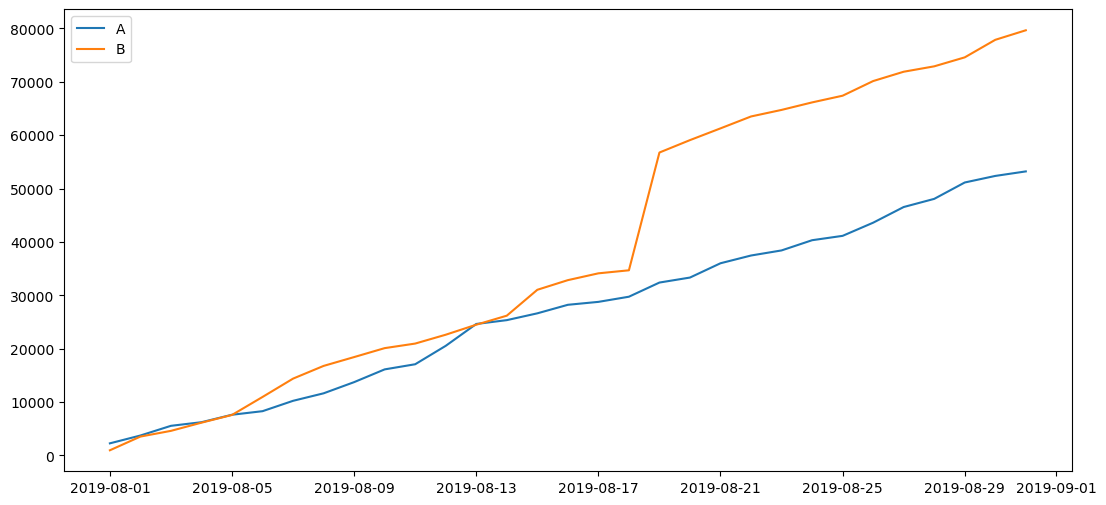

In [38]:
#trazando los gráficos
plt.figure(figsize = (13,6))
plt.plot(cumulativeRevenueA["date"], cumulativeRevenueA["revenue"], label = "A")
plt.plot(cumulativeRevenueB["date"], cumulativeRevenueB["revenue"], label = "B")
plt.legend()

Se puede observar que los ingresos aumentan constantemente para ambos grupos. El grupo B supera al A por poco durante el mes hasta que entre el 18-19 de agosto tiene un gran salto, para luego volver a mantenerse en constante crecimiento.

## Tamaño de pedido promedio acumulado por grupo

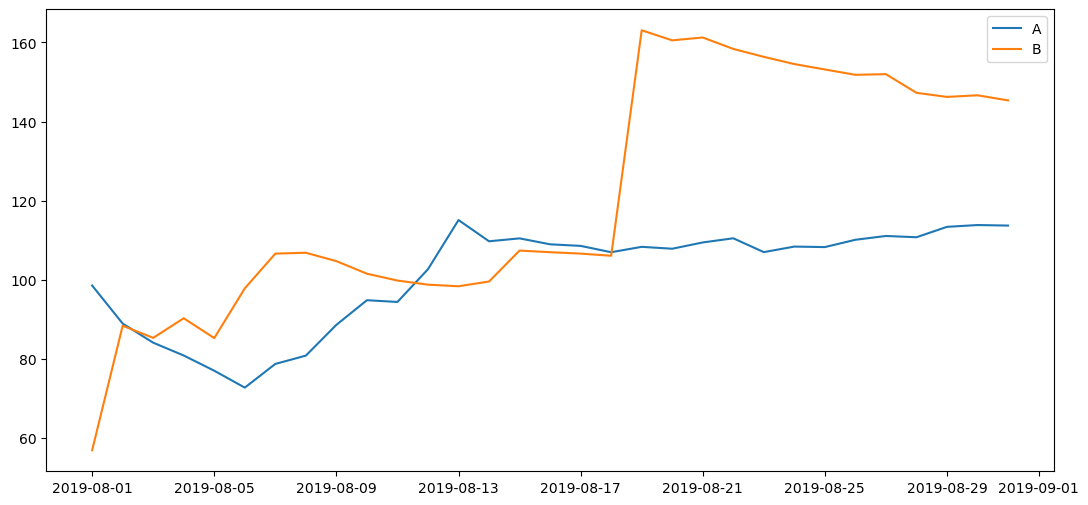

In [39]:
#graficando el tamaño promedio de compra para cada grupo
plt.figure(figsize = (13,6))
plt.plot(cumulativeRevenueA["date"], cumulativeRevenueA["revenue"]/cumulativeRevenueA["orders"], label="A")
plt.plot(cumulativeRevenueB["date"], cumulativeRevenueB["revenue"]/cumulativeRevenueB["orders"], label="B")
plt.legend()

El tamaño promedio es estable para A luego del 13 de agosto. Por otro lado, B tiene un salto entre el 18-19 de agosto y luego presenta un pequeño decrecimiento a través del tiempo.

## Diferencia relativa en el tamaño de pedido promedio acumulado para B en comparación con A

In [40]:
#creando el dataset para calcular la diferencia relativa
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = "date", right_on = "date", how="left", suffixes=["A", "B"])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


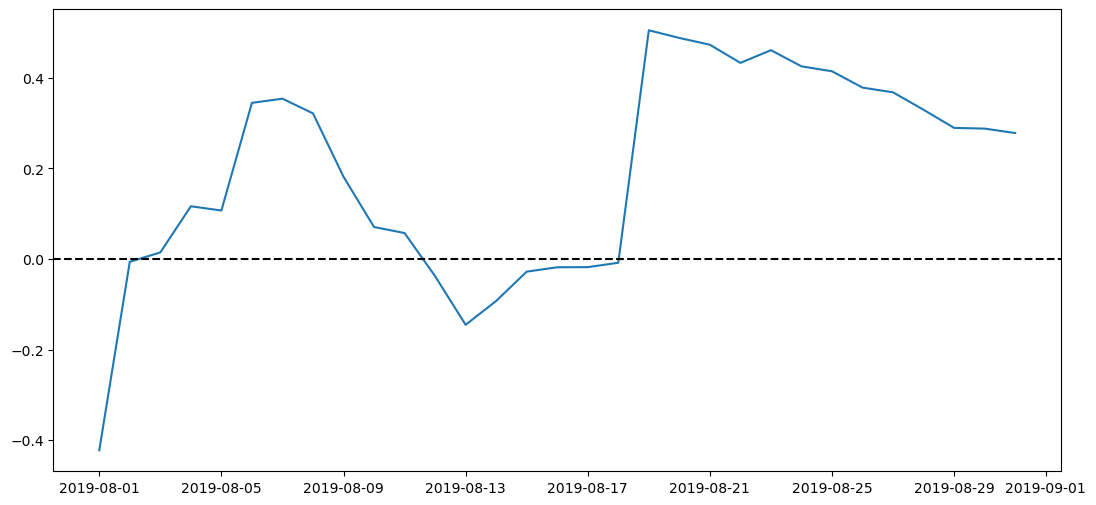

In [41]:
#graficando la diferencia relativa
plt.figure(figsize = (13,6))
plt.plot(mergedCumulativeRevenue["date"], (mergedCumulativeRevenue["revenueB"]/mergedCumulativeRevenue["ordersB"])/(mergedCumulativeRevenue["revenueA"]/mergedCumulativeRevenue["ordersA"])-1)
plt.axhline(y= 0, color= "black", linestyle= "--")

El ingreso que genera A es mayor en dos puntos, pero la mayor parte del tiempo B es el que genera más ingresos. También hay varios puntos con grandes saltos que aumentan, esto se puede deber a que hay algunos pedidos grandes y valores atípicos. 

## Tasa de conversión de cada grupo

In [42]:
#calculando la tasa de conversión de cada grupo
cumulativeData["conversion"] = cumulativeData["orders"]/cumulativeData["visitors"]
cumulativeDataA = cumulativeData[cumulativeData["group"] == "A"]
cumulativeDataB = cumulativeData[cumulativeData["group"] == "B"]
cumulativeDataB.head()

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,17,17,967.2,713,0.023843
3,2019-08-02,B,40,39,3535.3,1294,0.030912
5,2019-08-03,B,54,53,4606.9,1803,0.029950
7,2019-08-04,B,68,66,6138.5,2573,0.026428
9,2019-08-05,B,89,87,7587.8,3280,0.027134


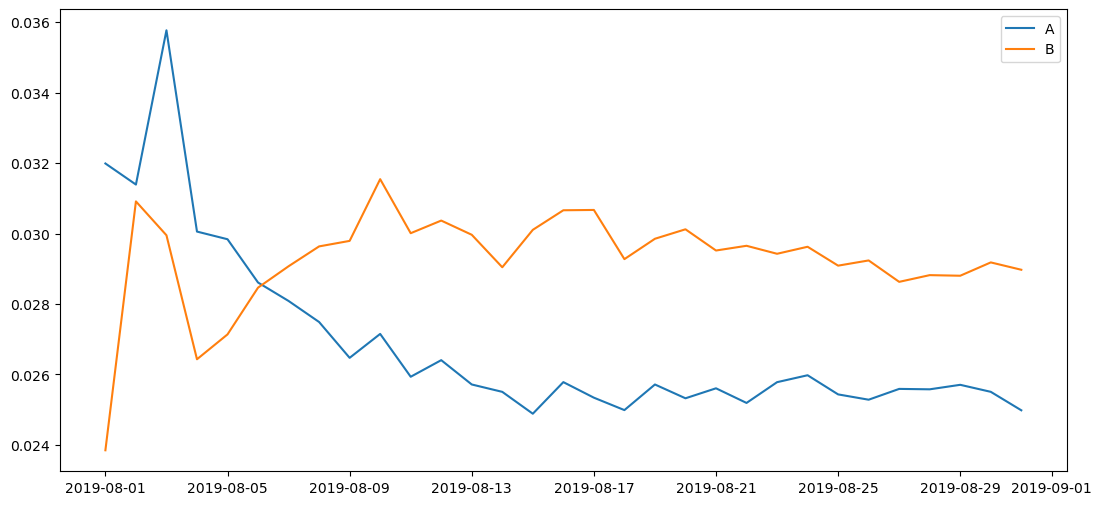

In [43]:
#graficando la tasa de conversión
plt.figure(figsize = (13,6))
plt.plot(cumulativeDataA["date"], cumulativeDataA["conversion"], label = "A")
plt.plot(cumulativeDataB["date"], cumulativeDataB["conversion"], label = "B")
plt.legend()

Los datos no son simétricos, eso es una buena señal.
Además, los datos fluctuan al rededor de un rango por el cual se mantienen a través del tiempo. El grupo B aumento para estabilizarse, mientras que el grupo A disminuyó y se estabilizó.

## Gráfico de dispersión del número de pedidos por usuario

In [44]:
#verificando el dataset orders
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [45]:
#agrupando orders por la cantidad de compras que realiza cada usuario
ordersByUsers = (orders.drop(["group", "revenue", "date"], axis=1).groupby("visitorId", as_index=False).agg({"transactionId": "nunique"}))
ordersByUsers.columns = ["visitorId", "orders"]
print(ordersByUsers.sort_values(by="orders", ascending=False).head(10))

      visitorId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


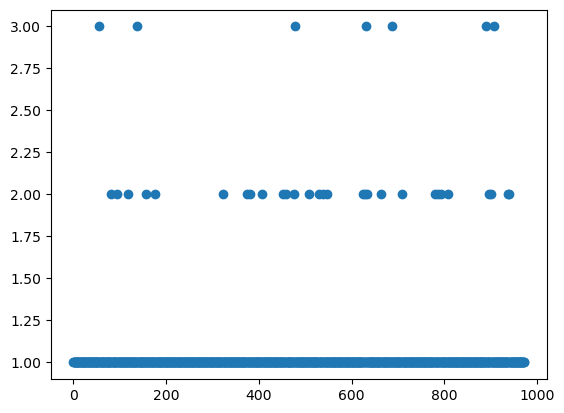

In [46]:
#graficando la dispersión de la cantidad de pedidos por usuario
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers["orders"])

In [47]:
#conteo de la cantidad de compras por usuario
ordersByUsers.groupby("orders").agg({"visitorId":"count"})

,visitorId
orders,
1,937
2,29
3,7


Como se puede observar, lo más común es que los compradores hagan 1 compra o a veces 2, pero es muy poco común que hagan 3. Solo 7 compradores hicieron 3 compras. 

## Percentiles 95 y 99 para el número de pedidos por usuario

In [48]:
#calculando el percentil de número de compras por usuario
print(np.percentile(ordersByUsers["orders"], [95,99]))

[1. 2.]


No más del 5% de los usuarios realizan más de 1 pedido y no más del 1% de los usuarios realiza más de 2 pedidos.

Es por lo anterior que se considerará que el límite es 2 pedidos por usuario, y las anomalías se eliminarán.

## Gráfico de dispersión de los valores de los pedidos

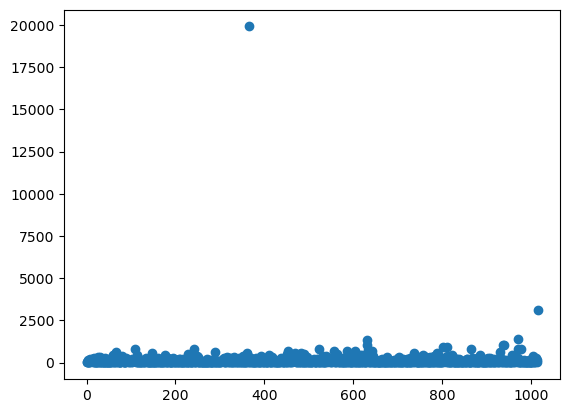

In [49]:
#graficando la dispersión del valor de cada compra
x_values = pd.Series(range(0, len(orders["revenue"])))
plt.scatter(x_values, orders["revenue"])

Se puede observar 1 o 2 valores de pedidos anómalos.

## Percentiles 95 y 99 de los precios de los pedidos

In [50]:
#calculando el percentil del valor de compra
print(np.percentile(orders["revenue"], [95,99]))

[414.275 830.3  ]


No más del 5% de las compras cuestan más de 414.275 y no más del 1% de las compras cuesta más que 830.3. Es por eso que se considera que el límite de valor de la compra es de 830.3 y el resto de información atípica será eliminada.

## Significancia estadística de la diferencia en la conversión entre los grupos (datos en bruto)

In [51]:
#agrupando el número de órdenes por visitante y por grupo
ordersByUserA = orders[orders["group"] == "A"].groupby("visitorId", as_index = False).agg({"transactionId":"nunique"})
ordersByUserA.columns = ["visitorId", "orders"]
ordersByUserB = orders[orders["group"] == "B"].groupby("visitorId", as_index = False).agg({"transactionId":"nunique"})
ordersByUserB.columns = ["visitorId", "orders"]
ordersByUserB.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [52]:
#declarando las variables con usuarios de diferentes grupos y numero de pedidos correspondientes
sampleA = pd.concat([ordersByUserA["orders"], pd.Series(0, index = np.arange(visits[visits["group"]=="A"]["visits"].sum() - len(ordersByUserA["orders"])), name = "orders")], axis = 0)
sampleB = pd.concat([ordersByUserB["orders"], pd.Series(0, index = np.arange(visits[visits["group"]=="B"]["visits"].sum() - len(ordersByUserB["orders"])), name = "orders")], axis = 0)

Hipótesis nula: No existe diferencia significativa en la conversión entre los grupos.

Hipótesis alternativa: Existe diferencia significatica en la conversión entre los grupos.

In [53]:
#imprimiendo la ganancia relativa de conversión para el grupo B
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.011
0.160


El valor de p (0.011) es menor que 0.05, por lo tanto, hay suficiente evidencia estadística para rechazar la hipótesis nula. Es probable que haya una diferencia estadísticamente significativa en la conversión entre los grupos.

## Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos (datos en bruto)

Hipótesis nula: No existe diferencia significativa en el tamaño promedio de pedido entre los grupos.

Hipótesis alternativa: Existe diferencia significativa en el tamaño promedio de pedido entre los grupos.

In [54]:
#imprimiendo la diferencia en el tamaño promedio de pedido
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.862
0.278


El valor p (0.862) es notablemente superior a 0.05 por lo que no hay motivo para rechazar la hipótesis nula y concluir que el tamaño medio de los pedidos difiere entre los grupos. Además, el tamaño de pedido promedio para el grupo B es mucho mayor que para el grupo A.

## Significancia estadística de la diferencia en la conversión entre los grupos (datos filtrados)

Se eliminarán los usuarios con más de 1 pedido (5% de los usuarios) y los que gastaron sobre 830.3 por compra (1% de los usuarios).

In [55]:
#filtrando los datos anómalos
usersWithManyOrders = pd.concat([ordersByUserA[ordersByUserA['orders'] > 2]['visitorId'], ordersByUserB[ordersByUserB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 830.3]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitorId, dtype: int64
(16,)


Se encontraron 16 usuarios anómalos.

In [56]:
#guardando la información sin datos anómalos
sampleAFiltered = pd.concat([ordersByUserA[np.logical_not(ordersByUserA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUserA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUserB[np.logical_not(ordersByUserB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUserB['orders'])),name='orders')],axis=0)

In [57]:
#imprimiendo la ganancia relativa de conversión para el grupo B
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.189


El p value (0.007) es menor a 0.05, por lo que se rechaza la hipótesis nula, es decir que es probable que haya una diferencia estadísticamente significativa en la conversión entre los grupos.

Sin los datos anómalos, aumentó la diferencia de conversión y esto es positivo para el grupo B.

## Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos (datos filtrados)

In [58]:
#imprimiendo la significancia estadística del tamaño promedio de pedido entre grupos
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.822
-0.032


El valor p disminuyó, pero sigue siendo menor a 0.05 por lo que no se puede rechazar la hipótesis nula. Ahora la diferencia es de -3.2% en lugar de 27.8%. Esto quiere decir que el tamaño promedio de la compra de A es mayor que la de B, pero por muy poco. 

## Decisión basada en los resultados de la prueba

- Se revelaron diferencias estadísticamente significativas en la conversión entre los grupos. Esta conversión es mayor en el grupo B.

- Ni los datos sin procesar ni los filtrados revelaron diferencias estadísticamente significativas en el tamaño promedio de los pedidos entre los grupos. Con los datos sin filtrar era mejor el grupo B, pero con los datos filtrados el tamaño promedio era mejor en A, por una diferencia mínima.

- Como se ve en los gráficos anteriores, la tasa de conversión para B se mantiene y es mayor que la de A, y además el ingreso también es mayor para B.

- Si el objetivo es mejorar la tasa de conversión, la prueba fue un éxito y se recomienda finalizar y pasar a la siguiente hipótesis. Por otro lado, si el objetivo es aumentar el tamaño promedio de pedido, se recomienda rechazar los cambios, finalizar la prueba y pasar a la siguiente hipótesis, ya que se demostró que A tiene mejor tamaño de pedido.

# CONCLUSIONES

Para la primera parte (Priorizar hipótesis) se concluyó que cuando se utiliza ICE y RICE, las primeras 5 mejores hipótesis son las mismas, solo que en distinta prioridad. Es mejor utilizar RICE ya que así se tiene en cuenta el alcance a los usuarios, es decir, con la aceptación de la hipótesis, cuantos usuarios se verán afectados. Las mejores hipótesis fueron la 7, 2, 0, 6 y 8.

Para la segunda parte (Análisis de test A/B) se concluyó que si el objetivo es mejorar la tasa de conversión, entonces la prueba fue un éxito y se recomienda concluir y pasar a la siguiente hipótesis. En caso de que el objetivo sea aumentar el tamaño promedio de pedido, la prueba no funciona y se recomienda mantener A e intentar otras hipótesis. 